# The 2 point correlation funciton, growth of large scales strucutres, and Baryon Acoustic Oscillations

## Authors
Jeff McMahon, Lindsey Bleem, and Alex Drlica-Wagner

 *Dedicated in the memory of Jeff's dad Tim who was always curious, always adventurous, and proud of him no mater what he did.*

## Background

It is well established that the Universe began in a hot dense state and expanded thereafter.  The initial conditions for this initial state are broadly consistant with the predictions of the inflationary paradigm.  This paraigm predicts a miniscule spectrum of density pererbations generated from quantum fluctuations in the first  $\sim 10^{-32}$ s.  These density perterbations evolve since the gravitational force causes overdensitys to collapse leading to regions of high pressure in the photon-baryon fluid that then expand.  These dynamics are acoustic oscillations.  As the universe expands, it cools to the point where elctrons and protons combine to form nutral hydrogen (recombination).  From this time onward the photons are no longer coupled to the barons.  This is the time at which the CMB is emitted.  The imprint of these acoustic oscilations explains the hot and cold spots of the CMB.  In particular the first (and tallest) acoustic peak of the CMB corresponds to the angular scale (wavelenght) at which matter has just collapsed to its maximum density.  At angular scales large than this, the finite speed of sound in the photon-baryon and the finite age of the unvierse limit the amount of collapse possible.   The physical scale of this peak is determined by the sound speed in the early universe and the time at whcih decoupling happens.  This is called the sound horizon.   Since the speed of sound and time of decoupling are known, the first peak represents a standard ruler and the measaurment of its angular scale provides the most precise constraint that our universe is spaitally flat. 

Decoupling also changes the evolution of the acoustic osscilations.  After this time, the photons nolonger contribue pressure and the baryon fluid starts to collapse.  Thus, the inflationary signal that gives rise to the CMB anisotropy also gives rise to the formation of large scale strucutres.   Thus measurments of the spectrum of large scale structures prvides a complementarly constrainsts on comsological paramters.   One key difference between the CMB and these large scale structures is that they exist in three diemnsions: two spatial directions on the sky, and in redshift.  This provides an avenue to measure the grwoth of strucutre and trace its evolution, first a the CMB and then as strucutres evolve with redshift.   

The full spcturm is needed to harvest all possible inforamation.  However, just as the CMB has peaks which represent special, and easy to understand features, so does the specturm of large scale strucutre.  The relevent feature arrises from Baryone Accoustic Oscillations (BAO). 


The BAO feature arises as follows.  At the time of decoupling the sound horzion gives a scale with a maximum overensity.  Upon decoupling, with no photon pressure to resist furhter collapse strucutres grow at all scles. However, since the scale corresponding to the sound horizon is the most overdense at this time, it is expected to have an enahncment of collapsed strucutres (galaxies, gas, etc.).  It constitues an additional standard ruler for cosmologial measuemnts.   It can be observed by tracing the neutral hydrogen at high redshift, or by tracing the overdensity of galaxies at lower redshifts.  It has been detected with spectroscipic measurmnts of galaxies observed in the optical bands first by SDSS and 2dFGRS.  

Since then multiple teams have confirmed and improved these measurmnts.  Notably, DESI is currently observing with the goal of making the most ambitious measurment to date.   The cosmological imporatance of this measrument is that  by observing the BAO in multiple redshfit slices, one can reconstruct the angular diameter distance as a function of redshift.  This provides a sensitive probe of dark energy, neutrino masses, the Hubble constant, and other cosmological paramters.  

Just as the first peak is measured by computing the angular power specturm of the CMB, the BAO features is measured by computing the mater power spectrum or a related quantity- the 2 point correlation funciton.  It is important to note that the 2 point correlation evolves with redshfit and contains much more information beyond the BAO feature. For example the evlolution of the spectrum traces the evolution and growth of structure.


## Notebook Goals
In this notebook you will gain hands on experiance working with spectocopic data to measure the 2 point correlation fuction.  statistical measurements of galaxy clustering by calculating the angular two-point (2pt) correlation function. You will develop and apply a correlation function analysis to galaxies from the SDSS spectroscopic sample.  This tutorial follows an analysis of early SDSS data by [Connolly et al. 2001](https://arxiv.org/abs/astro-ph/0107417), and by the end you will have produced a figure similar to their [Figure 1](https://arxiv.org/pdf/astro-ph/0107417.pdf#page=7).  We will discuss extensions to this simple analysis.


In [2]:
# Standard python imports

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Data Used
The data will be drawn from the Sloan Digitial Sky Survye (SDSS) Data relase 16 (DR16).  These data can be querried here http://skyserver.sdss.org/dr16/en/tools/search/SQS.aspx.  We have downloaded two tables giving redshfit, ra, dec, and color inforamtion for objets classified as galaxcies over a 5x5 degree region. The two sets span the redshift ranges of $0.08<𝑧<0.12$ and $0.4<𝑧<0.5$.  The region is from Ra 0 to 5degrees and Dec from 0 to 5 degrees.  For ease of use we have downoladed tables containing these data for you. The columns of these data are descirbed in the comments in the cells below.


In [7]:
# read in the data
path='your/path/to/data'
path='/Users/reneehlozek/Code/CMBS4/'
low_Z_spec_galaxies = np.loadtxt(path+"SDSS_spextral_galaxies_z0.1to0.2_wide.csv",delimiter = ",", skiprows=2,usecols=(3,12,13,14,15,16,19,20))
mid_Z_spec_galaxies = np.loadtxt(path+"SDSS_spextral_galaxies_z0.4to0.5_wide.csv",delimiter = ",", skiprows=2,usecols=(3,12,13,14,15,16,19,20))
high_Z_spec_galaxies = np.loadtxt(path+"SDSS_spextral_galaxies_z0.6to0.9_wide.csv",delimiter = ",", skiprows=2,usecols=(3,12,13,14,15,16,19,20))


## column ids
# 0  z
# 1  ra
# 2  dec
# 3  r magnitude   (red)
# 4  u magnitude   (Ultra Violet)
# 5  g magnitude   (green)
# 6  u-g color
# 7  g-r color (redness)


## Playing with and visualzing the data

### Spatial distribution of objects

As a first check, let's plot the spatial distributions of objects in our sample.


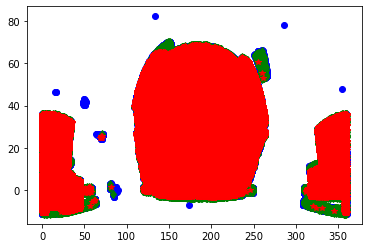

In [12]:
plt.plot(low_Z_spec_galaxies[:,1],low_Z_spec_galaxies[:,2],color="b", linestyle='None', marker='o')
plt.plot(mid_Z_spec_galaxies[:,1],mid_Z_spec_galaxies[:,2],color="g", linestyle='None', marker='d')
plt.plot(high_Z_spec_galaxies[:,1],high_Z_spec_galaxies[:,2],color="r", linestyle='None', marker='*')
plt.show()



To reduce the computational challenge of carrying out our analysis, let us select a subset of these data on a square patch.

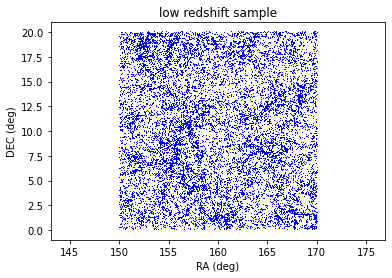

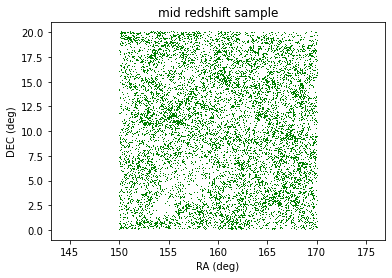

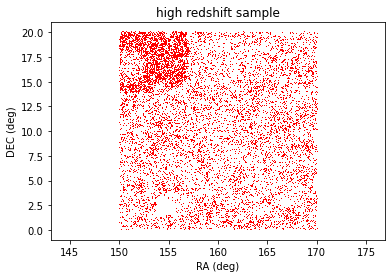

In [16]:
## write a fuction ot select objects in a square patch
def select_objects_in_radec_range(map_,ra_min,ra_max,dec_min,dec_max):
    dec_ok = np.logical_and(map_[:,1] > ra_min,map_[:,1] < ra_max)
    ra_ok  = np.logical_and(map_[:,2] > dec_min,map_[:,2] < dec_max)
    ok = np.where(np.logical_and(dec_ok,ra_ok))
    return(np.ravel(ok))

## set boundaries for the square
ra_min = 150
ra_max = 170
dec_min = 0
dec_max = 20

## come up with arrayse of indexes for each of the three redshift slices
ok_low_Z = select_objects_in_radec_range(low_Z_spec_galaxies,ra_min,ra_max,dec_min,dec_max)
ok_mid_Z = select_objects_in_radec_range(mid_Z_spec_galaxies,ra_min,ra_max,dec_min,dec_max)
ok_high_Z = select_objects_in_radec_range(high_Z_spec_galaxies,ra_min,ra_max,dec_min,dec_max)


## plot the spatial distribtuiion of galaxies in these tiles

plt.plot(low_Z_spec_galaxies[ok_low_Z,1],low_Z_spec_galaxies[ok_low_Z,2],"b,")
plt.title("low redshift sample")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()
plt.plot(mid_Z_spec_galaxies[ok_mid_Z,1],mid_Z_spec_galaxies[ok_mid_Z,2],"g,")
plt.title("mid redshift sample")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()
plt.plot(high_Z_spec_galaxies[ok_high_Z,1],high_Z_spec_galaxies[ok_high_Z,2],"r,")
plt.title("high redshift sample")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()

<font color='red'>EXCERCISE: </font> 

1. Are these objects randomly distributed? [Make a histogram of the objects] Think about the structures seen in the low redshift sample in particular.

2. Are the distributions of objects in the low, mid, and high redshfits maps the same?  Think about why you would expect the stuctures not to be common.  Discuss whether the clumpiness is the same or different and why you would expect that to be different in the different maps.  (Note, ignore the strange feature in the upper left of the high redshift sample for this question.)

3. What do you think the strange feature in the upper left of the high redshfit sample is?


In [44]:
## Your code here

Your comments here


### Redshift evolution

It is obvious from the previous excercise (and set of plots) that the distribution of these objects evolves with redshift.  One advantage of these spectroscopic data is that they have a resolution in redshfit with an accuracy better than one part in 1500.  (This accuracy is called R).  Therefore it is possible to measure the distribution of matter along the line of sight as well as in the spatial dimensions.  

Here we plot the distribution of galaxies in the RA/redshift plane, but fixing a single Dec.

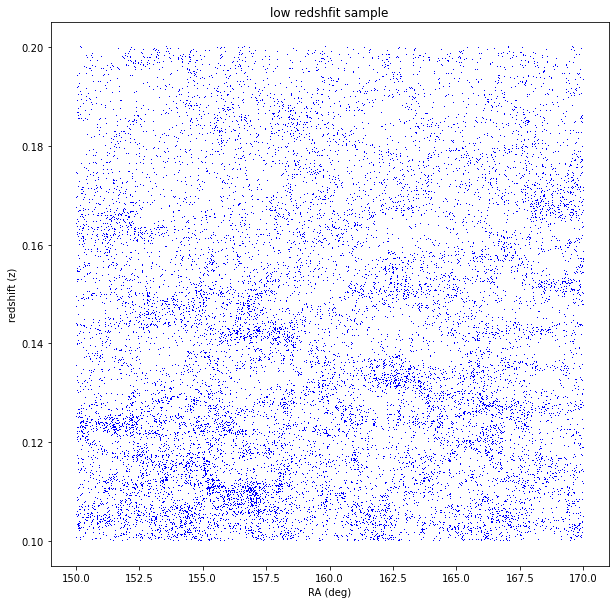

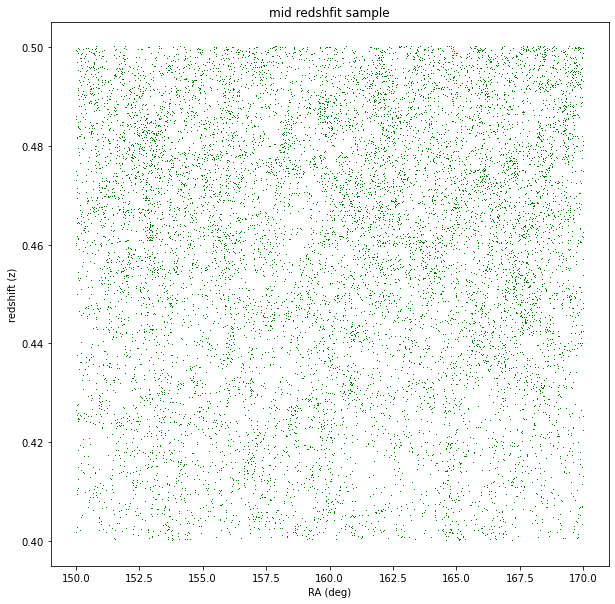

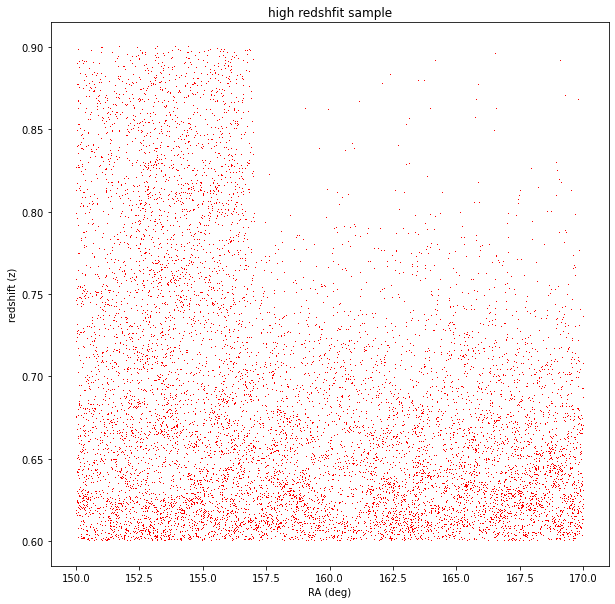

In [47]:
plt.figure(figsize=(10,10))
plt.plot(low_Z_spec_galaxies[ok_low_Z,1],low_Z_spec_galaxies[ok_low_Z,0],"b,")
plt.title("low redshfit sample")
plt.xlabel("RA (deg)")
plt.ylabel("redshift (z)")
plt.show()
plt.figure(figsize=(10,10))
plt.plot(mid_Z_spec_galaxies[ok_mid_Z,1],mid_Z_spec_galaxies[ok_mid_Z,0],"g,")
plt.title("mid redshfit sample")
plt.xlabel("RA (deg)")
plt.ylabel("redshift (z)")
plt.show()
plt.figure(figsize=(10,10))
plt.plot(high_Z_spec_galaxies[ok_high_Z,1],high_Z_spec_galaxies[ok_high_Z,0],"r,")
plt.title("high redshfit sample")
plt.xlabel("RA (deg)")
plt.ylabel("redshift (z)")
plt.show()

<font color='red'>EXCERCISE: </font> 

1. What evolution do you see in the low redshift slice.  Based on this, is the redshift range too large or about right for measuring the spatial variations in LSS?

2. Do you see any strange features in the high redshift slice?  What do you think is causing this?

Your comments here


### Object selection

One other feature in the data is the nature of the objects.   The objects we have been considering have a "galaxy calssification".  This classification is based on immaging an separating things that look like point sources and things that are diffuse.   This separation is not perfect, and some diffuse obects can be related to instrument effects or other astrophsyical objets.   One way to probe the nature of the objects is to evaluate the relationship between their color and magnitude.  Magnitude is the intensity of the light from the object.  This can be bolometric intensity (which is the brightness as observed) or the absolute mangitude which is the intensity with a correction for distance (redshift) so it quantifes the intensity of the light emitted from the galxay.  Intensity is measured on a logarithmic scale with *negative* intensity corrresponding to brighter galaxies than *positive intensity*. Color is quantified by measurin the intensity in different bands and taking the difference.   

In the data set provided, we have the red (r), UV (u), ang green (g) magnitudes, and colors (u-g) and (g-r).  Here we plot the r magnitude vs the g-r color for the low redshfit sample.


Text(0, 0.5, 'g-r color')

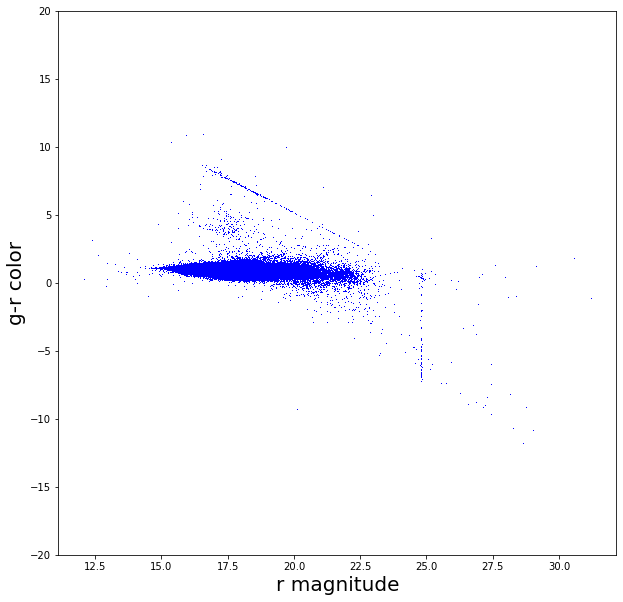

In [31]:
plt.figure(figsize=(10,10))
plt.plot(low_Z_spec_galaxies[:,3],low_Z_spec_galaxies[:,7],"b,")
plt.ylim(-20,20)
plt.xlabel('r magnitude', fontsize=20)
plt.ylabel('g-r color', fontsize=20)


<font color='red'>EXCERCISE: </font> 

Are all the objects in this plot well behaved galaxies?   Do you see any evidence for systematic effects?   Do you see evidence for multiple galaxy populations of objects?   How might you separate these populations for an analysis?


# Analysis 

Our goal is to quantify the level correlation (which is clearly visible by eye) in this data set.  We will focus on the two point angular correlation rather than the 3-d two point correlation which is slightly tricker to implement. This analysis is eqivelent, and mathematically related to a power spectrum analysis.
 

First we write code to generate a random distribution of objects.  We will use this as point of comparison for our quantitative treatment.  


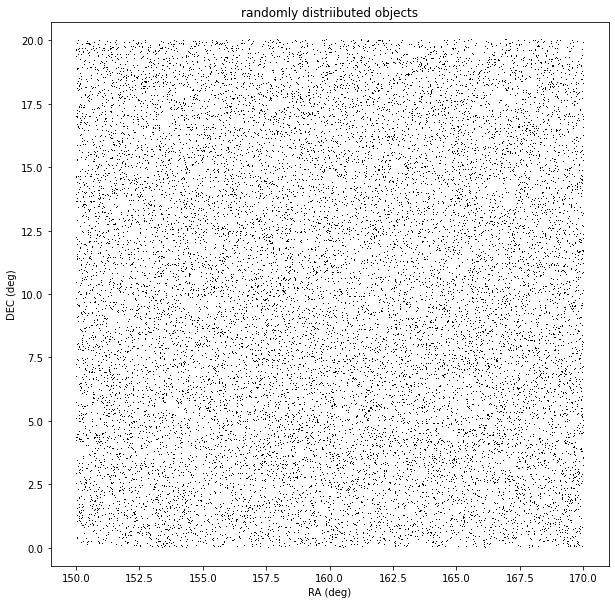

In [32]:
# function to generate ra and dec coordinates for N random objects 
#in a square box in RA and DEC
def generate_random_ra_dec(N,ra_min, ra_max, dec_min, dec_max):
    ra = np.random.uniform(low = ra_min, high = ra_max, size = N)
    dec = np.random.uniform(low = dec_min, high = dec_max, size = N)
    return(ra,dec)

## generate a randomly distribtued set of objects in the same RA, 
## DEC range, and with the same number of objets as our low Z sample
rand_ra,rand_dec = generate_random_ra_dec(np.size(low_Z_spec_galaxies[ok_low_Z,1]),
                                          ra_min, ra_max, dec_min, dec_max)


## plot this randomly distribtued simulation
plt.figure(figsize=(10,10))
plt.plot(rand_ra,rand_dec,"k,")
plt.title("randomly distriibuted objects")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()

<font color='red'>EXCERCISE: </font> 

Compare this to the plot above of the low-z sample.  What is different?



We will now develop the angular two point correlation function.  This function is the probability of finding galxies  as a function of their angular seperation.   This can be computed with a simple and ubqiutous tool, the histogram.   Our first job is to compute the histogram of the separation of these data.  

Below is a function that carries this out.  This function takes in two sets of inputs $ra_1$, $dec_1$, and $ra_2$, $dec_2$.   If we pass the same data in as for the first and second data sets then it computes the two point correlation with itself, the *auto-correlation*.  If we pass differnet data sets then it computes the cross-correlation.  We will use this to compute the correct two point correlation below.


initilized binning


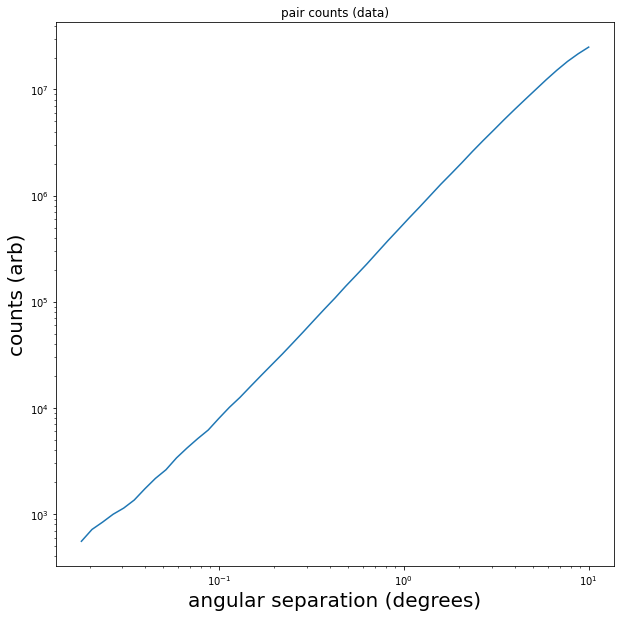

In [45]:
# code to compute the pair counts (histogram)

def pair_counts(ra1,dec1,ra2,dec2,histogram_bins):
    ra1  = np.ravel(ra1)
    dec1 = np.ravel(dec1)
    ra2  = np.ravel(ra2)
    dec2 = np.ravel(dec2)
    N = np.size(ra1)
    i = 0
    while (i < N):
        ra_cur= ra1[i]
        dec_cur = dec1[i]
        distance = np.sqrt((ra2-ra_cur)**2 + (dec2 - dec_cur)**2)
        ok = np.where(distance > 0.01)
        distance = distance[ok]
        if i == 0:
            histogram_out, bin_edges = np.histogram(distance,bins = histogram_bins)
            print("initilized binning")
        histogram_cur, bin_edges = np.histogram(distance,bins = histogram_bins)
        histogram_out += histogram_cur
        i+=1
    return(histogram_out,bin_edges)

## seting up the bins for the pair count
histogram_bins = np.logspace(-1.8,1)

# choosing the data to pass into the pair counts
data_ra  = low_Z_spec_galaxies[ok_low_Z,1]
data_dec = low_Z_spec_galaxies[ok_low_Z,2]



## calculate the pair counts for the Data
DD,bins = pair_counts(data_ra,data_dec,data_ra,data_dec,histogram_bins)


## plot the pair count histogram for the Data
plt.figure(figsize=(10,10))
plt.loglog(bins[1:],DD)
plt.title("pair counts (data)")
plt.xlabel("angular separation (degrees)",fontsize=20)
plt.ylabel("counts (arb)", fontsize=20)
plt.show()


<font color='red'>EXCERCISE: </font> 

Compute the pair count histogram for the random field and compare it (by plotting both on the same axes) to the histogram from the data. What difference do you note between theses two pair counts? How does this vary with angle?  Does this match your expectations from looking at the maps?


In [ ]:
## code goes here


Your comments here


Now we define the a correlation function such that purely random data gives no correlation.  This analysis follows [Connolly et al. 2001] (https://arxiv.org/abs/astro-ph/0107417)

We use the estimator presented in Landy & Szalay (1993) (http://articles.adsabs.harvard.edu/full/1993ApJ...412...64L). 

$$W(\theta) = \frac{DD - 2DR + RR }{RR}$$

Here DD is the data auto-correlation (above), RR is the random auto-correlation, and DR is the data-random correlation.  This is compuated by the first set of ra, dec arguments to the pair_counts function be from the data and the second from the random distribution.   

Note: if both data sets are random you would expext this function to return zero correlation. Try it!  



<font color='red'>EXCERCISE: </font> 

Test that the correlatoin function returns zero if both data sets are random. NOTE -- you must generate two random data sets for this to be a non-trivial tests (discuss why?).  Call this set rand_ra2,rand_dec2 to avoid confusion with the true data.  Plot this with "semilogx" (eg linear y axis) since we expect the result to scatter around zero.



In [42]:
## your code goes here


<font color='red'>EXCERCISE: </font> 

Compute the correlation function for the data and plot on log-log plots.  Compare this to [Figure 1](https://arxiv.org/pdf/astro-ph/0107417.pdf#page=7).



In [43]:
## your code goes here


<font color='red'>EXCERCISE: </font> 

1. Did you recover the correct slope of the power spectrum?

2. If the probability is above the random value at some scales, it must be below random on others.  Thus the dip at a few degee scales is real and corresponds to the existence of voids.

3. Did you recover the correct normalization?  If not, why might it be off?


<font color='red'>EXCERCISE: </font> 

Compute the angular two point from a higher redshift slice.   Plot these aginst each other. Do they agree or not?  Why might explain the differences?



In [46]:
## your code here



Your discussion here


## Discussion

With high quality data is is possible to measure the BAO peak (150 Mpc, ~2 degrees at z = 2) with the angular correlation fuction.  However, a better method is to compute the three diemensional power correlation.  To do this one would cover to spatial cooordinates whcih requires accounting for distance (redhsift) and the cosmological evolation of the scale factor.  Once the data are in spatial coordinates (eg MPC for X,Y,Z) then one can comput the 3d correlation using methods nearly identical to those presnted above.  This is left as an optional and advanced excercise to the stduent.

We hope this exercise has given you a familarity with the evoluton of large scale structure as it can be seen in spectroscopic data.  We also hope we have demystified the 2pt correlation function.